In [14]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt

import sys
sys.path.append("../../lib")
from stpalette import palette1
from cheatmap import cplot
from utils_lineage import plotTree
from utils import loadCNVfromInferCNV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = 'WM4237'

In [3]:
dataPath = '../../data/'
preprocessedInferCNVDataPath = 'c:/Projects/A_ST/inferCNV_results_%s/' % model

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
sids = [id[7:12] for id in ids]
ids

['WM4237_T0_S1_ST',
 'WM4237_T0_S2_ST',
 'WM4237_T1_S1_ST',
 'WM4237_T1_S2_ST',
 'WM4237_T2_S1_ST',
 'WM4237_T2_S2_ST',
 'WM4237_T3_S1_ST',
 'WM4237_T3_S2_ST',
 'WM4237_T4_S1_ST',
 'WM4237_T4_S2_ST',
 'WM4237_TC_S1_ST',
 'WM4237_TC_S2_ST',
 'WM4237_TE_S1_ST',
 'WM4237_TE_S2_ST',
 'WM4237_TE_S3_ST',
 'WM4237_TE_S4_ST']

In [4]:
palette1.update({sid: cm.terrain(0.01 + i/len(sids)) for i, sid in enumerate(sids)})

# Load CNV data

In [5]:
df_infercnv_cnv, df_infercnv_meta = loadCNVfromInferCNV(dataPath + 'For_inferCNV_%s_meta.data.tsv.gz' % model, 
                                                        [preprocessedInferCNVDataPath + 'infercnv.references.txt',
                                                         preprocessedInferCNVDataPath + 'infercnv.observations.txt'])

(8897, 18397) (18397, 3)


# Heatmap of CNVs

# By time points

In [147]:
def plotOneTimePoint(df, df_meta, timePoint, random_seed=42, sample=None, reference={'time': 'T0', 'cluster':'6'}, label=''):
    
    np.random.seed(random_seed)
    
    if not sample is None:
        df_meta_temp = df_meta[df_meta['time']==timePoint].sample(sample, axis=0).astype(str)[['time', 'cluster']].sort_values(by=['time', 'cluster'], ascending=False)
    else:
        df_meta_temp = df_meta[df_meta['time']==timePoint].astype(str)[['time', 'cluster']].sort_values(by=['time', 'cluster'], ascending=False)
        
    df_temp = df[df_meta_temp.index]
    try:
        df_temp = df_temp.droplevel(['sample', 'cluster', 'time'], axis=1)
    except:
        pass
    
    res = cplot(df_temp, df_meta_temp, sampleMED=1000, clusterObsByGroups=False, optimalOrderingForObs=False,
                palette=palette1, clusterVar=False, clusterObs=True, addLinesOnHeatmap=False, addLinesOnGroups=False, useMEDforObsGroups=True, useMEDforObs=True,
                reference=reference, colorbarLabel='%sCNV' % label, colorbarLabels=['Ampl.', 'Del.'], safetyLimit=5000)

    res = cplot(df_temp, df_meta_temp, sampleMED=1000,
                palette=palette1, clusterVar=False, clusterObs=True, addLinesOnHeatmap=True, addLinesOnGroups=False, useMEDforObsGroups=True,
                reference=reference, colorbarLabel='%sCNV' % label, colorbarLabels=['Ampl.', 'Del.'])

    plotTree(*res, seed=0, useSpringLayout=False)
    return

### InferCNV CNV

Before filtering: (8897, 4960)
After filtering: (8897, 4960)
Using sMED
Before filtering: (8897, 4960)
After filtering: (8897, 4960)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:20<00:00, 52.02s/it]


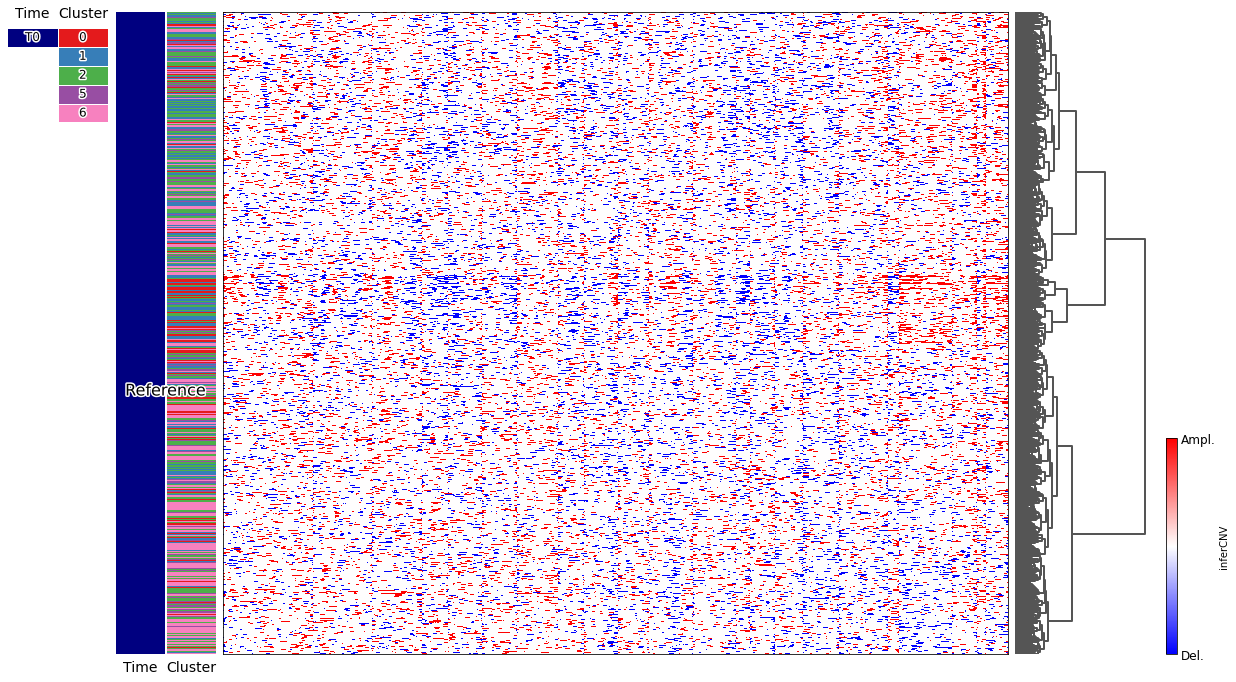

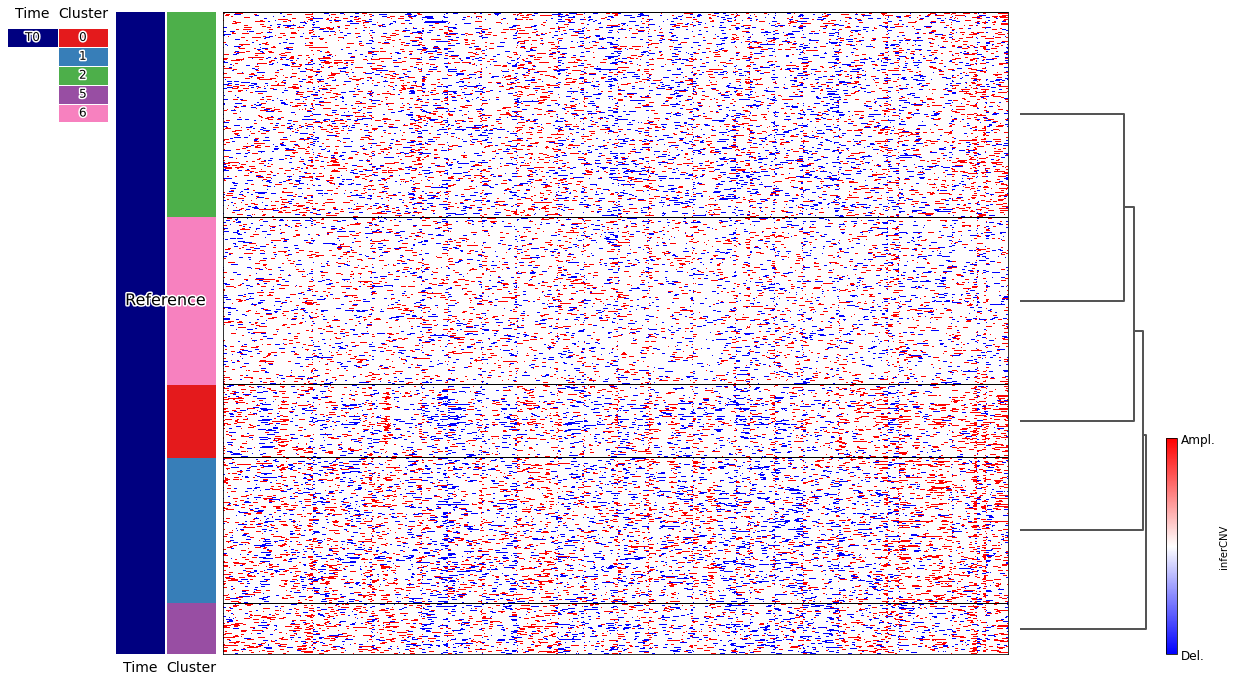

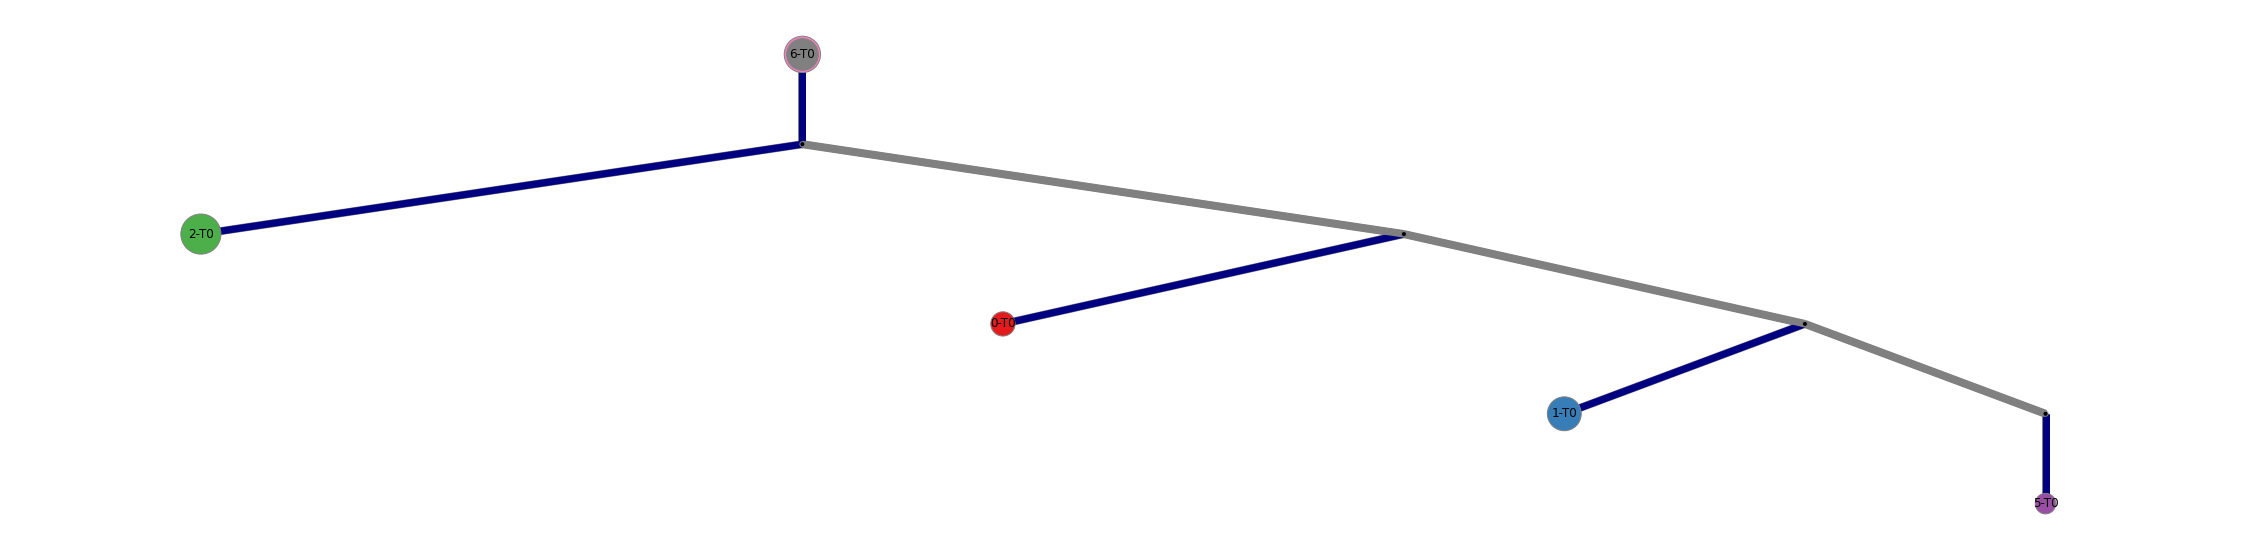

In [150]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T0', label='infer')

Before filtering: (8897, 479)
After filtering: (8897, 479)
Using sMED
Could not add reference label
'T0'
Before filtering: (8897, 479)
After filtering: (8897, 479)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.12it/s]


Root not found
Could not add reference label
'T0'


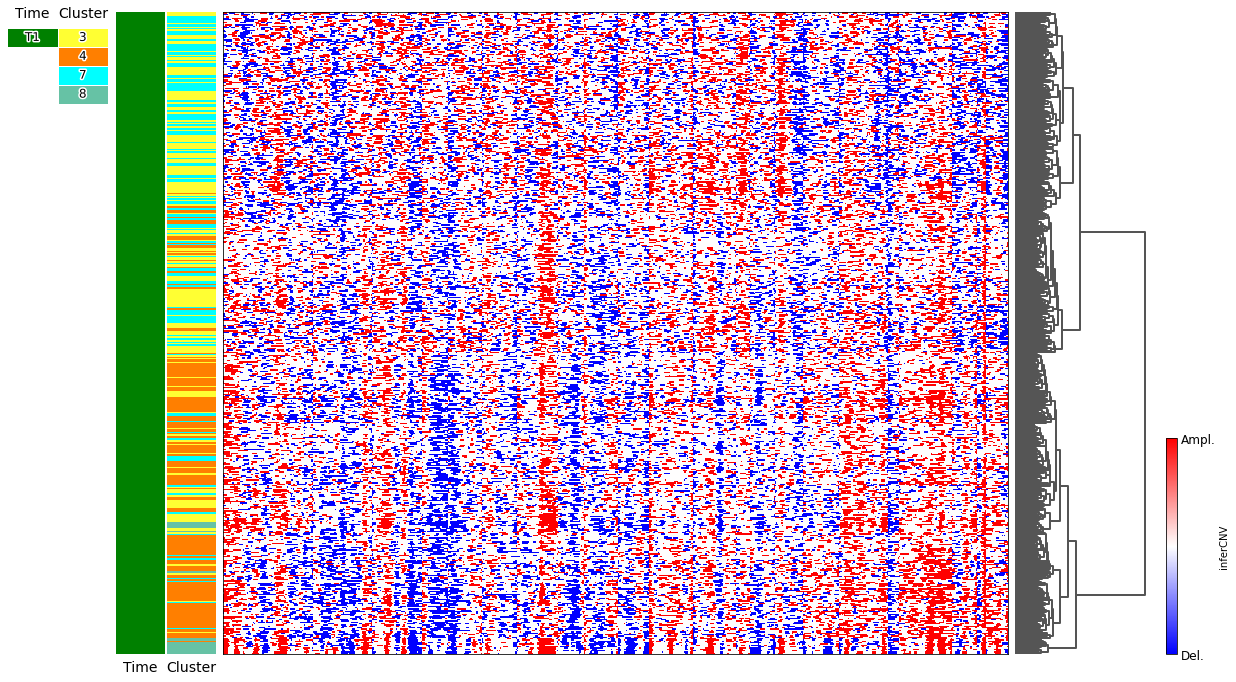

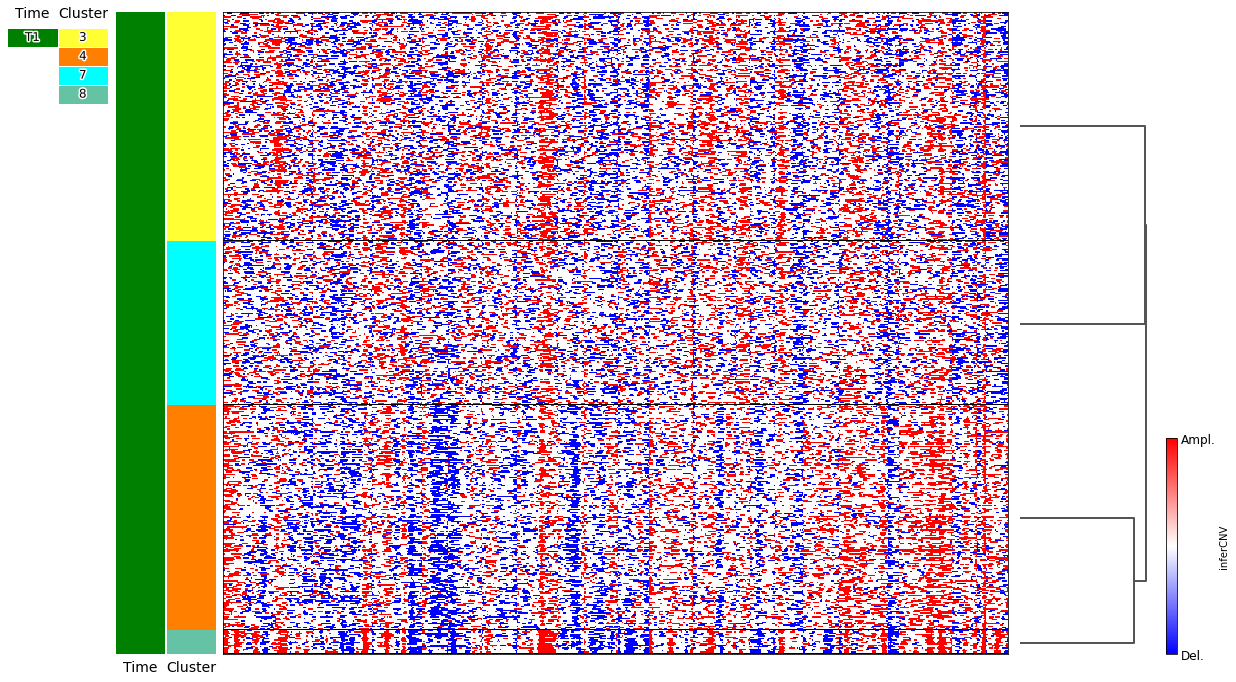

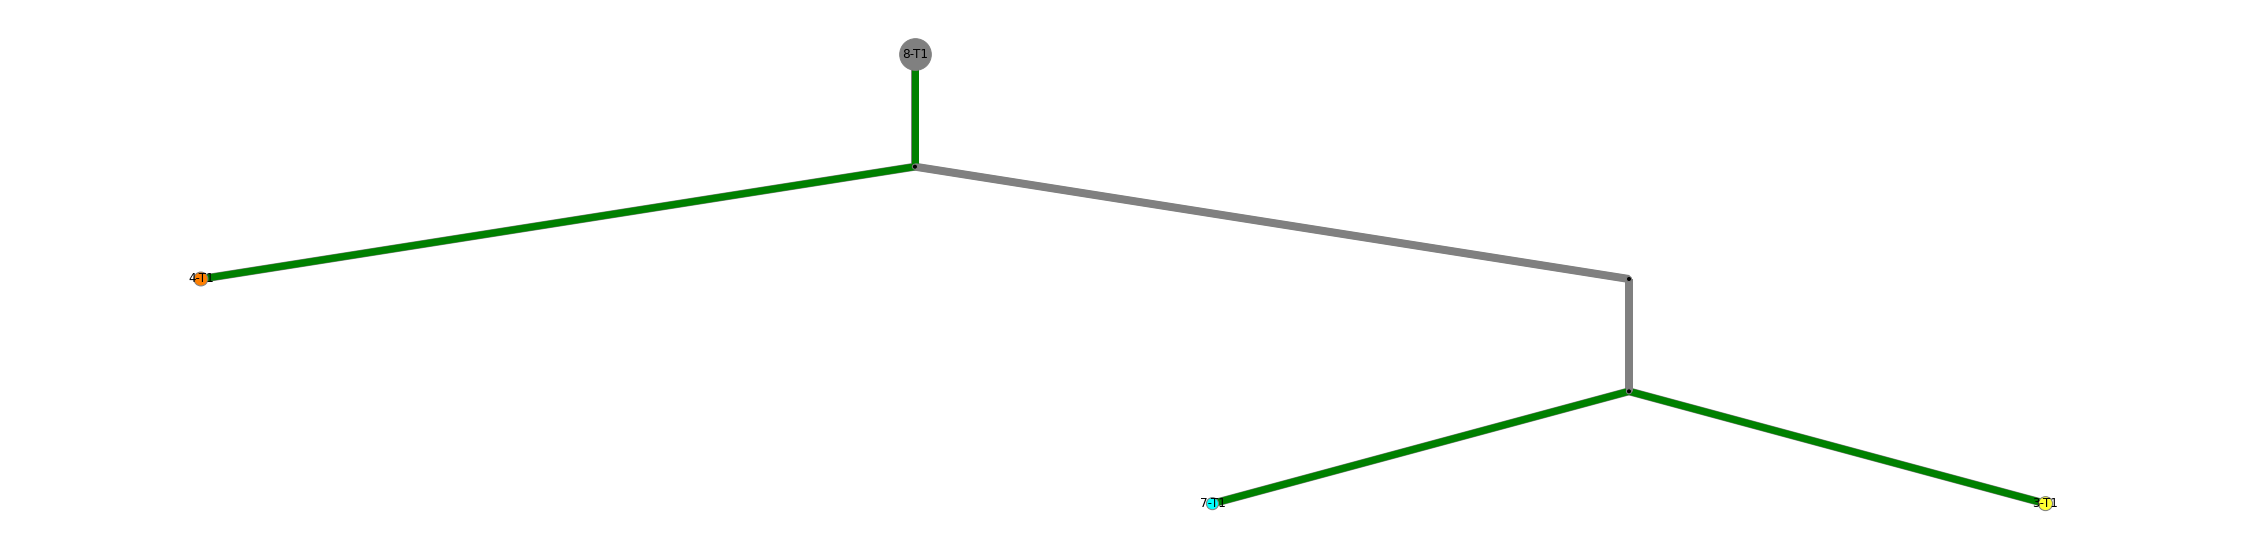

In [151]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T1', label='infer')

Before filtering: (8897, 1312)
After filtering: (8897, 1310)
Using sMED
Could not add reference label
'T0'
Before filtering: (8897, 1312)
After filtering: (8897, 1310)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:26<00:00,  6.73s/it]


Root not found
Could not add reference label
'T0'


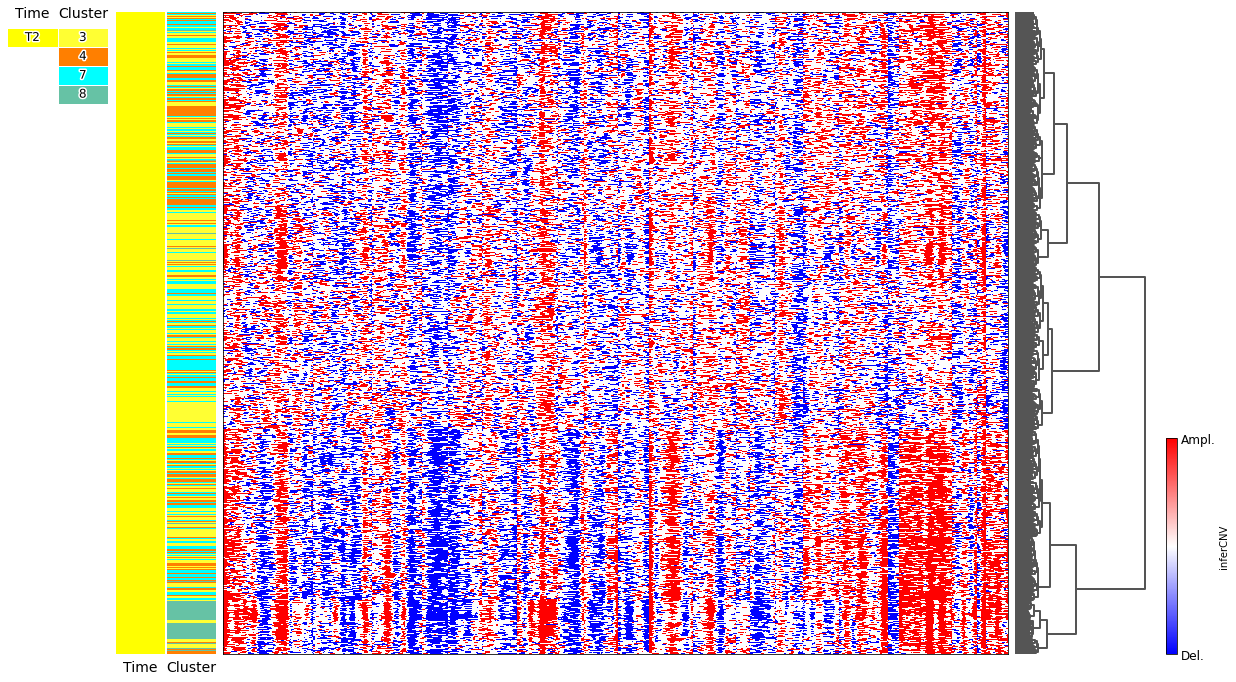

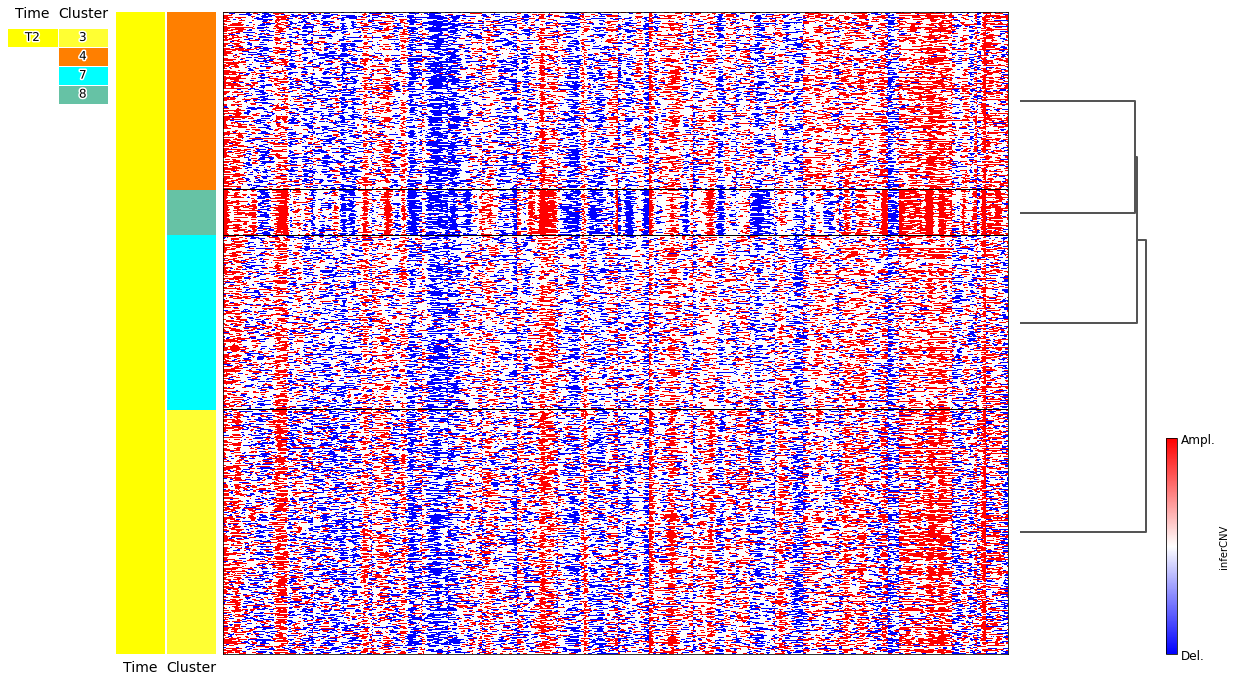

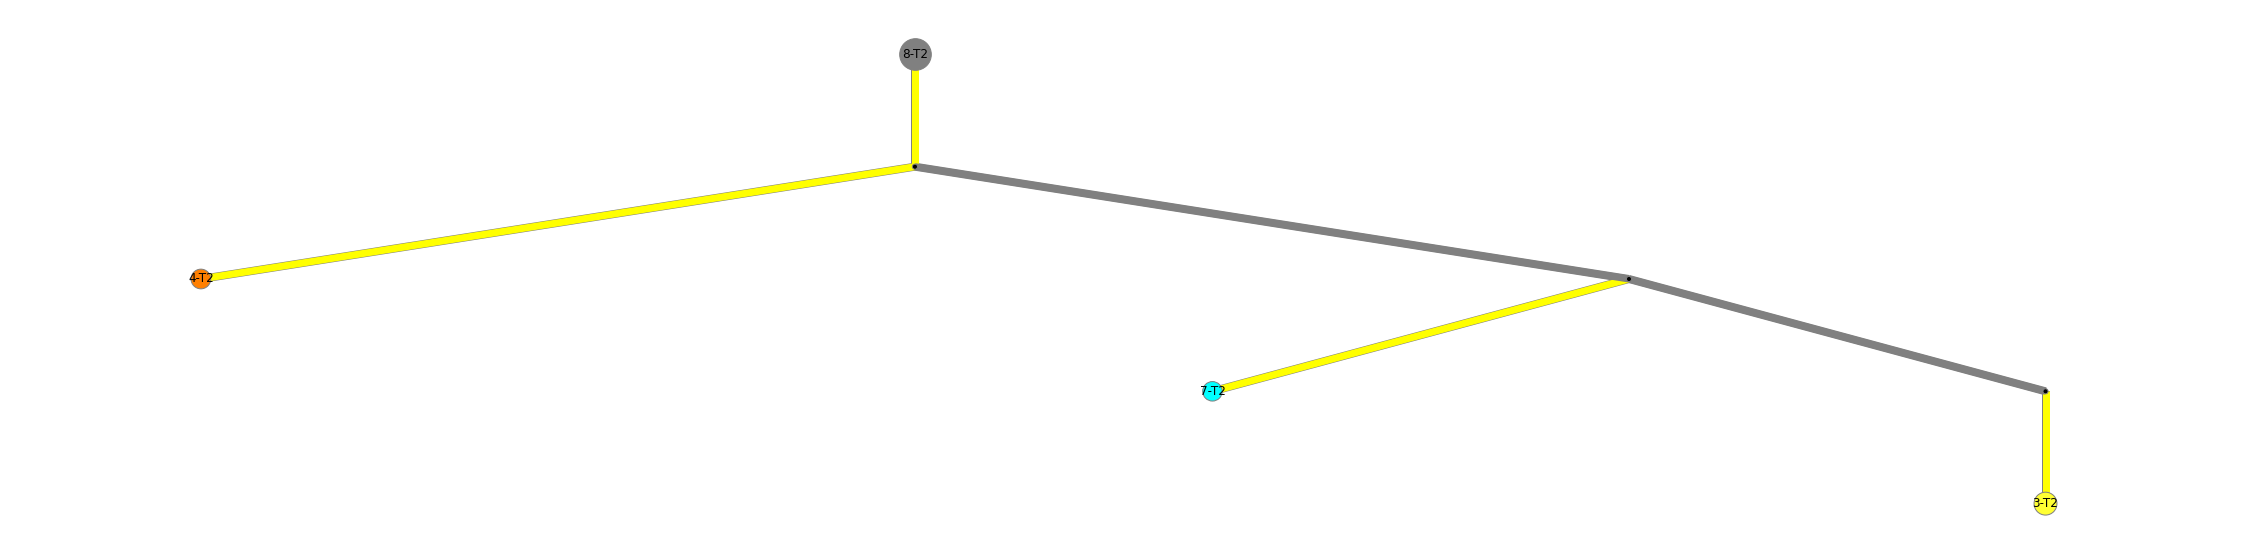

In [152]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T2', label='infer')

Before filtering: (8897, 1901)
After filtering: (8897, 1896)
Using sMED
Could not add reference label
'T0'
Before filtering: (8897, 1901)
After filtering: (8897, 1896)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:52<00:00,  8.72s/it]


Root not found
Could not add reference label
'T0'


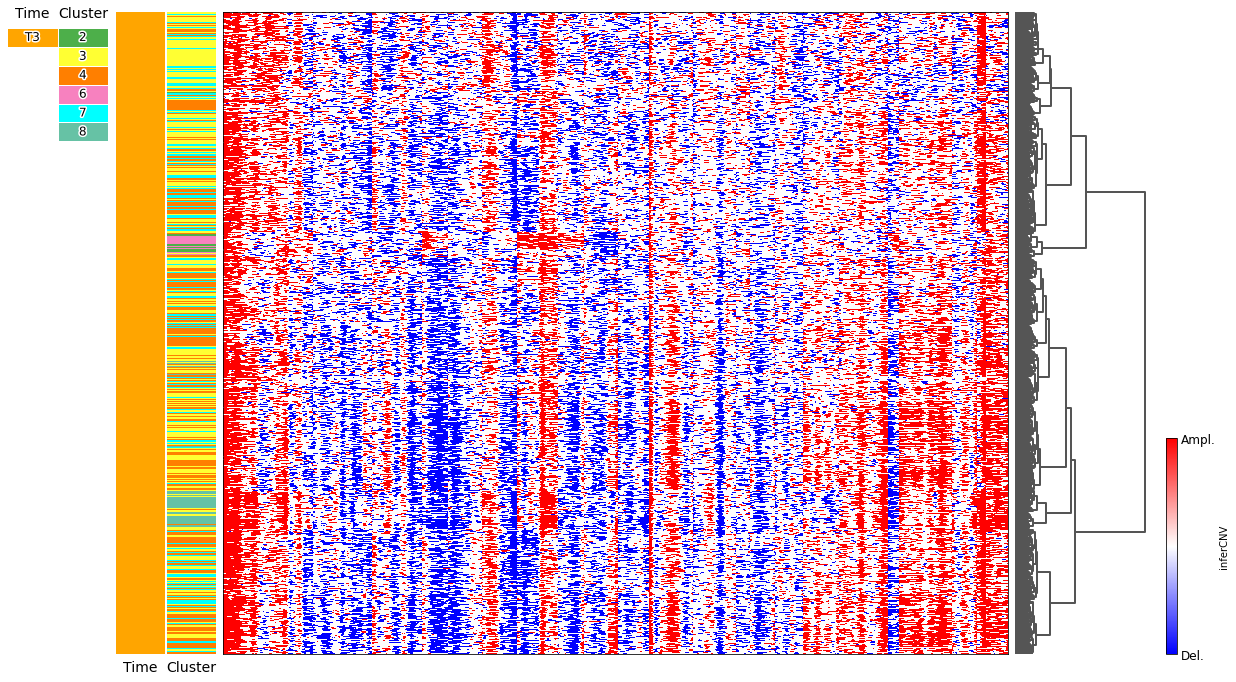

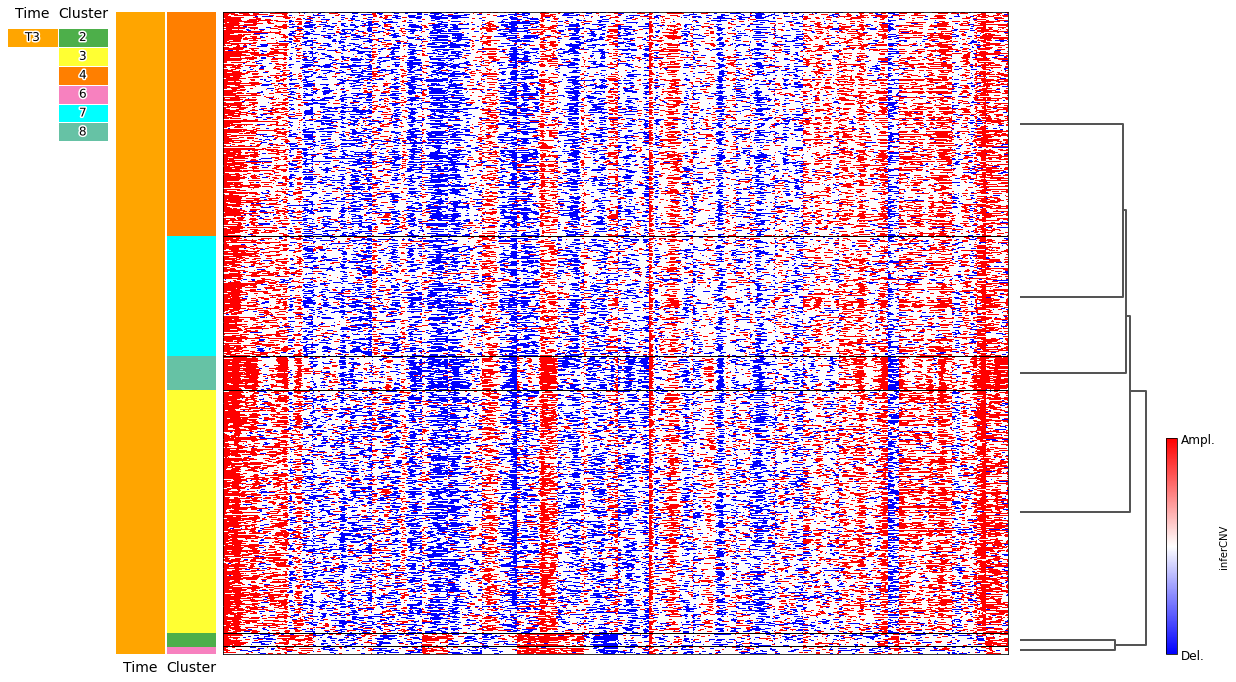

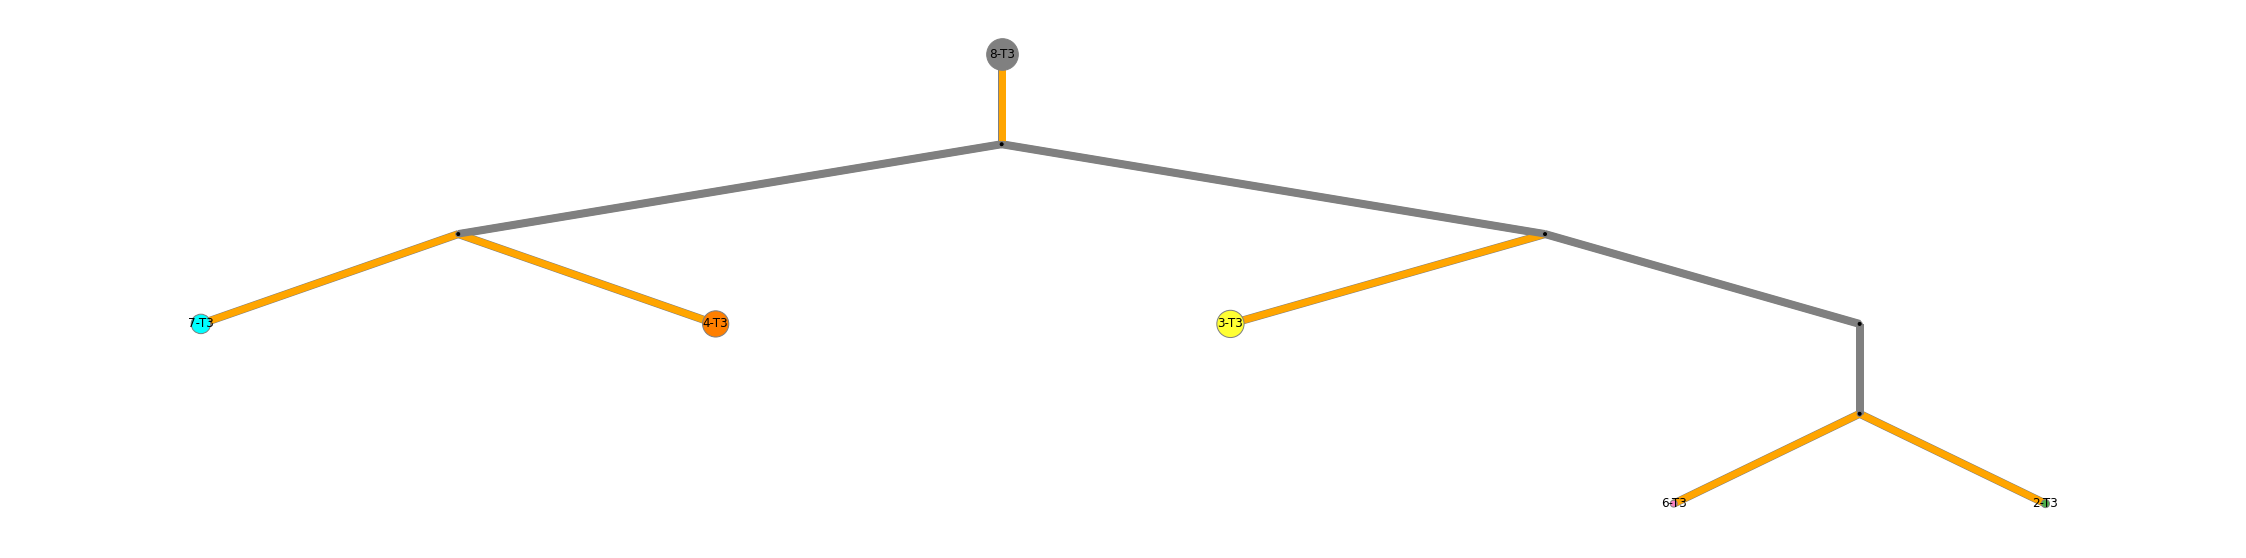

In [153]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T3', label='infer')

Before filtering: (8897, 3253)
After filtering: (8897, 3253)
Using sMED
Could not add reference label
'T0'
Before filtering: (8897, 3253)
After filtering: (8897, 3253)
Calculating sMED metric by groups.
Subsampling each group to have at most 1000 observations.


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:51<00:00, 19.06s/it]


Root not found
Could not add reference label
'T0'


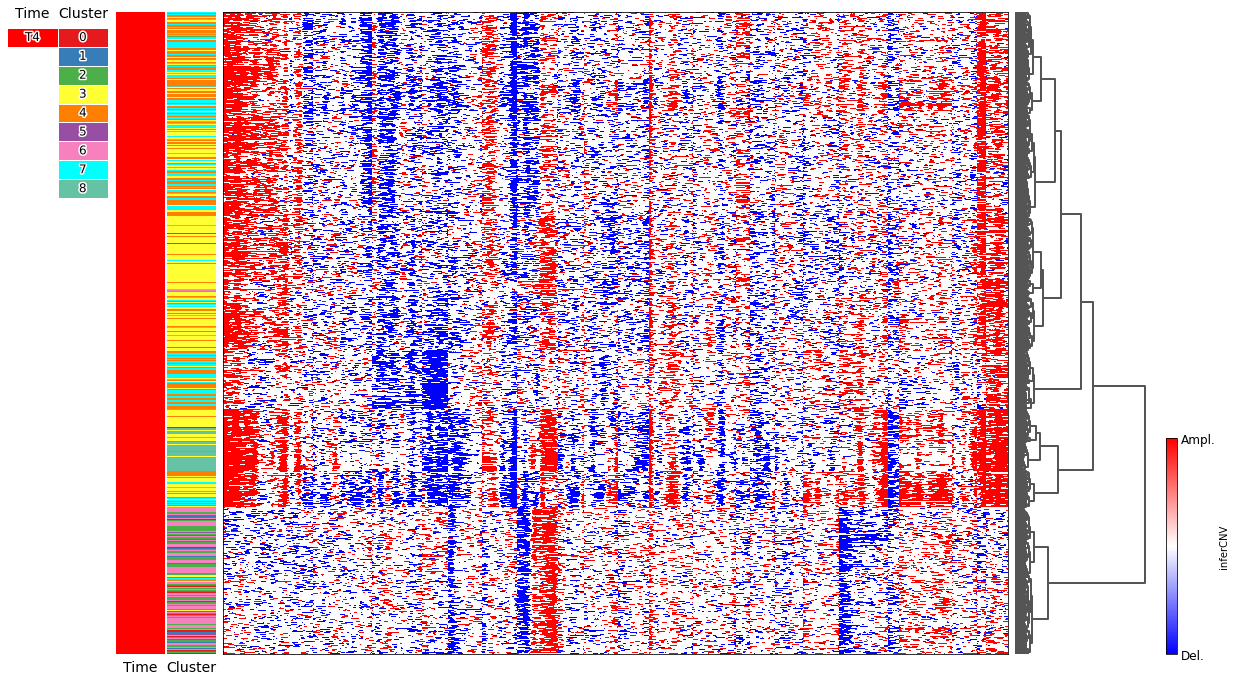

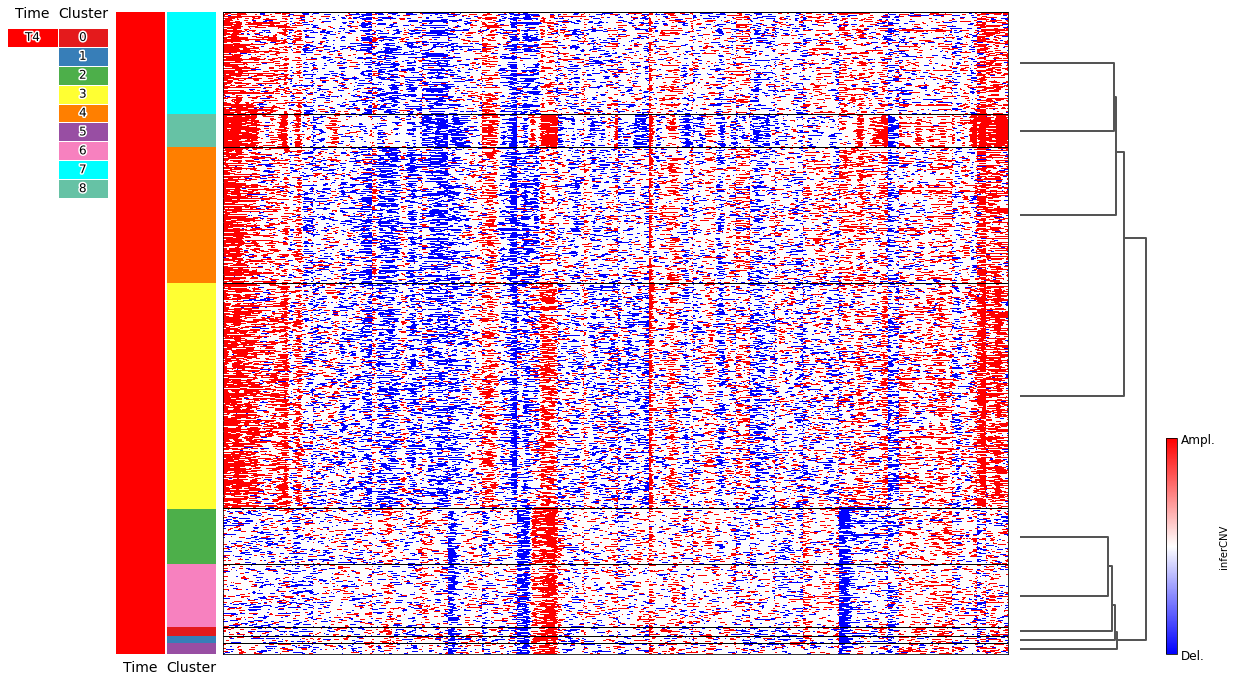

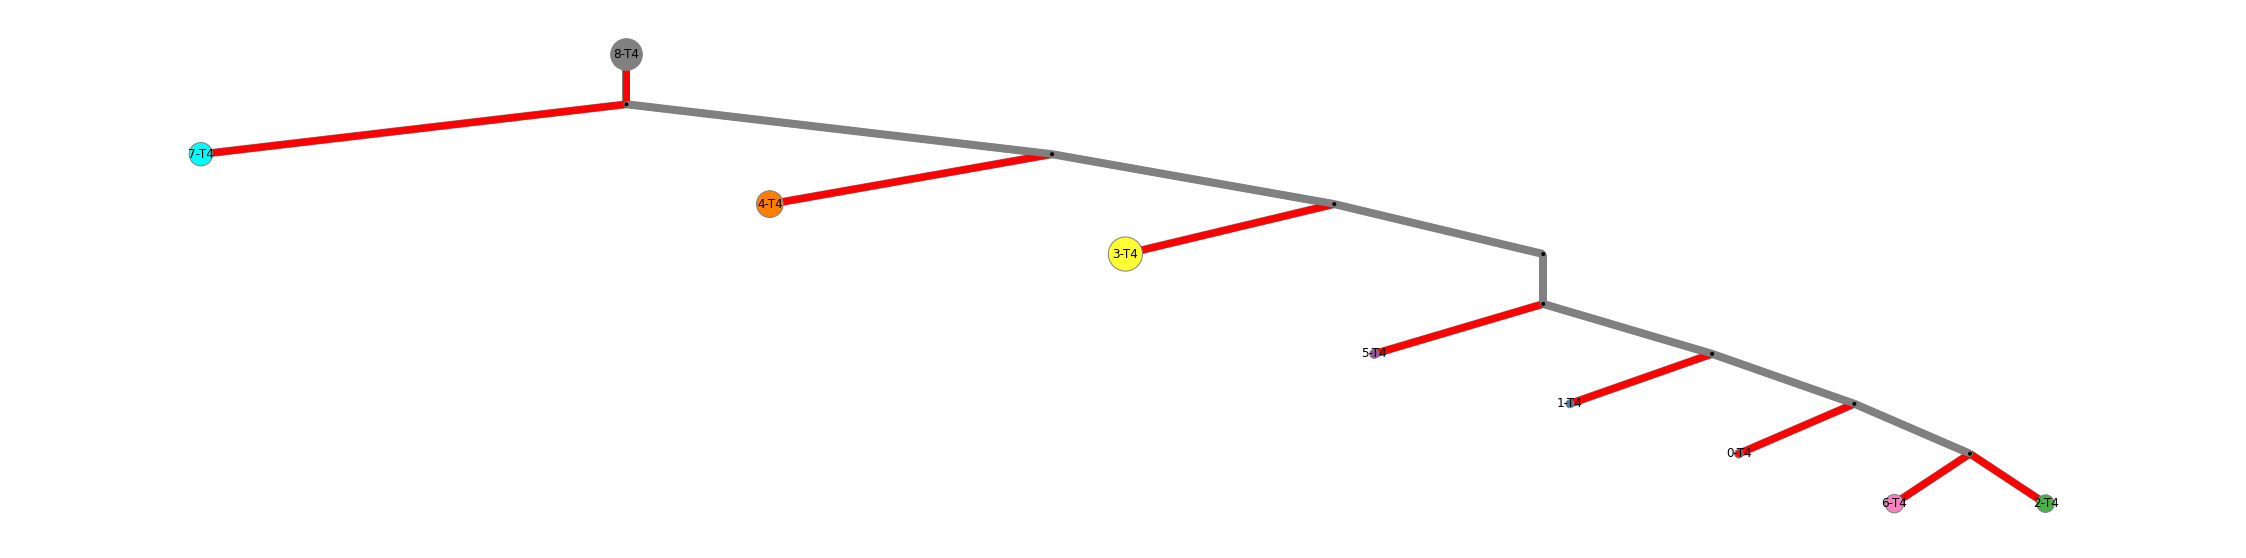

In [154]:
plotOneTimePoint(df_infercnv_cnv, df_infercnv_meta, 'T4', label='infer')

# All data together

Before filtering: (8897, 18397)
After filtering: (8897, 18387)
Calculating sMED metric by groups.
Subsampling each group to have at most 100 observations.


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [04:08<00:00,  6.53s/it]


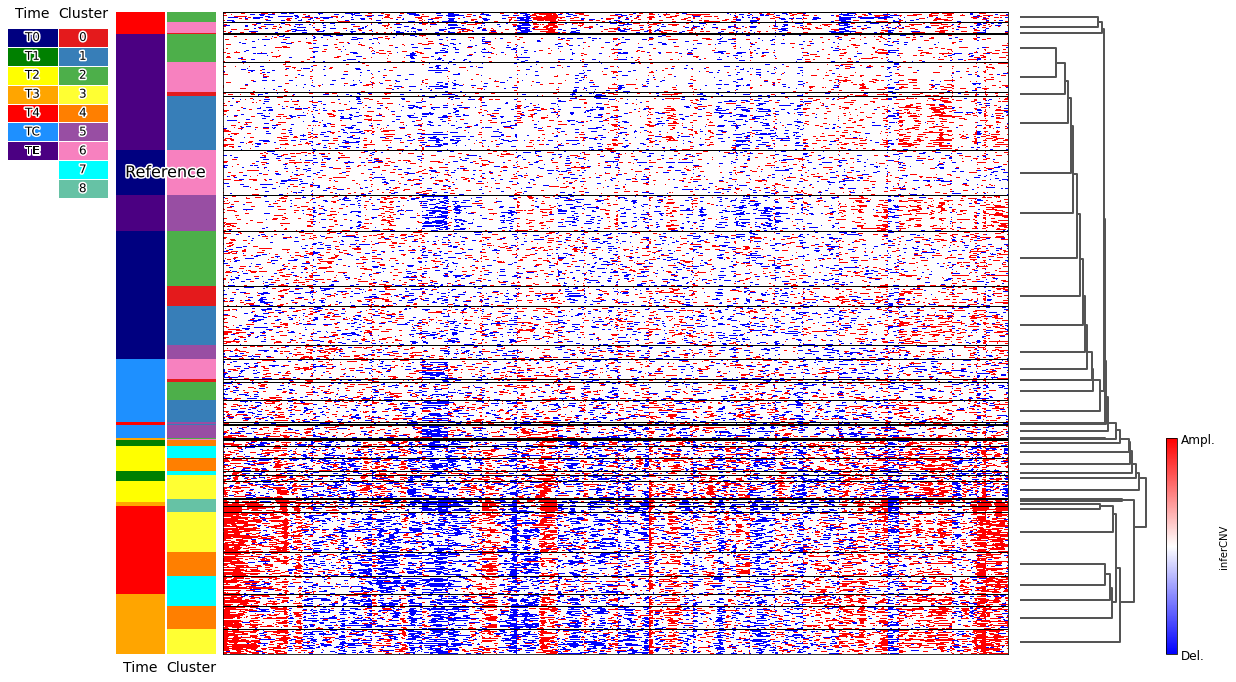

In [134]:
df_meta_temp = df_infercnv_meta.astype(str)[['time', 'cluster']].sort_values(by=['time', 'cluster'], ascending=False)
resInferCNV = cplot(df_infercnv_cnv[df_meta_temp.index], df_meta_temp, sampleMED=100,
            palette=palette1, clusterVar=False, clusterObs=True, addLinesOnHeatmap=True, addLinesOnGroups=False, useMEDforObsGroups=True,
            reference={'time': 'T0', 'cluster':'6'}, colorbarLabel='inferCNV', colorbarLabels=['Ampl.', 'Del.'])

In [6]:
import scanpy as sc

In [7]:
# Load CNV clusters identities
ad_cnv_obs = sc.read(dataPath + 'ad_all_human_clustered_cnv_%s.h5ad' % model).obs['cnv_clusters']
df_infercnv_meta['lin.'] = ad_cnv_obs.loc[df_infercnv_meta.index]

In [8]:
ad_all = sc.read(dataPath + 'ad_all_human_clustered_st_%s.h5ad' % model)
ad_all = ad_all[ad_all.obs['human_ratio']>=0.25]
filter_spots_index = ad_all.obs.index.copy()
ad_all.X = None

In [9]:
df_infercnv_meta = df_infercnv_meta.loc[df_infercnv_meta.index.isin(filter_spots_index)]
# df_infercnv_meta = df_infercnv_meta.loc[~df_infercnv_meta['lin.'].isin(['10'])]
df_infercnv_meta['lin.'].value_counts()

0     3623
1     2962
2     2504
3     2472
4     1898
5     1237
6      997
7      758
8      704
9      637
10     425
11     180
Name: lin., dtype: int64

After filtering: (8897, 18328)


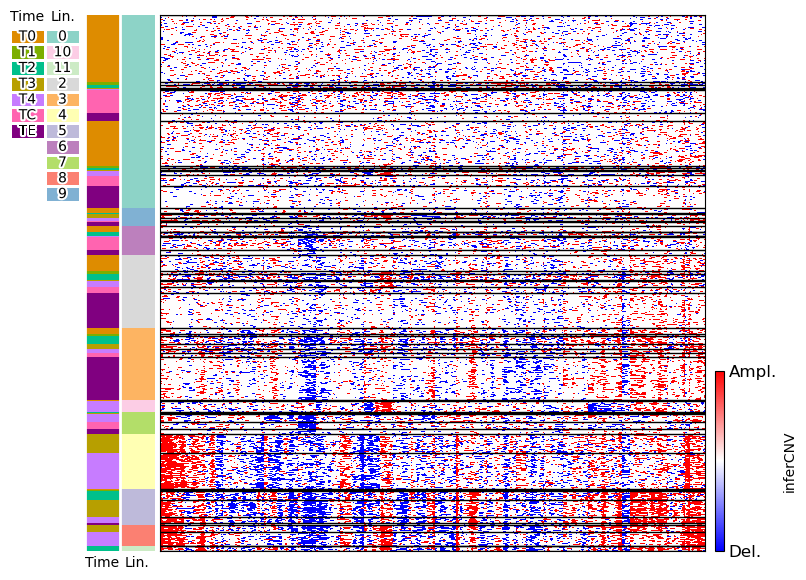

In [13]:
cnv_palette = {str(i): cm.Set3(c-1) for i, c in enumerate([0, 1, 9, 6, 2, 3, 10, 7, 4, 5, 8, 11])}
cnv_palette.update({'T0': '#DE8C00', 'T1': '#7CAE00', 'T2': '#00C08B', 'T3': '#B79F00', 'T4': '#C77CFF', 'TC': '#FF64B0', '-1': 'white', 'TE': 'purple'})

df_meta_temp = df_infercnv_meta.astype(str)[['time', 'lin.']].sort_values(by=['time'], ascending=False)
df_meta_temp = df_meta_temp.iloc[np.hstack([np.argwhere(df_meta_temp['lin.'].values==str(c)).T[0] for c in reversed([0, 1, 9, 6, 2, 3, 10, 7, 4, 5, 8, 11])])]

resInferCNV = cplot(df_infercnv_cnv[df_meta_temp.index], df_meta_temp, sampleMED=10, seed=0, figsize=(10,9),
            palette=cnv_palette, clusterVar=False, clusterObs=False, addLinesOnHeatmap=True, addLinesOnGroups=False, useMEDforObsGroups=True,
            colorbarLabel='inferCNV',
            saveFig=True, figureName='CNV_WM4237', dpi=500,
            colorbarLabels=['Ampl.', 'Del.'])

After filtering: (8897, 14023)


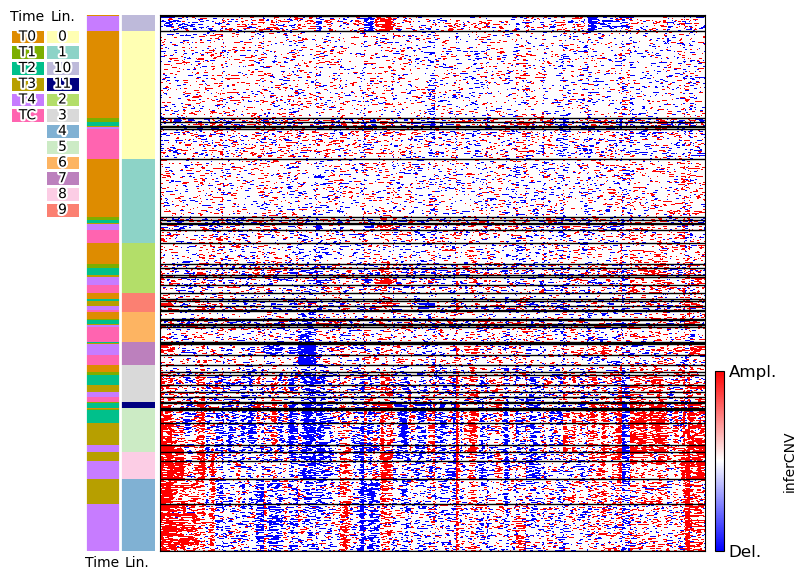

In [16]:
# order = [0, 1, 9, 6, 2, 3, 10, 7, 4, 5, 8, 11] # v0
order = [10, 0, 1, 2, 9, 6, 7, 3, 11, 5, 8, 4] # v1
# order = [10, 1, 0, 9, 6, 2, 7, 3, 4, 8, 11, 5] # v2

cnv_palette = {str(i): cm.Set3(c-1) for i, c in enumerate(order)}
cnv_palette.update({'T0': '#DE8C00', 'T1': '#7CAE00', 'T2': '#00C08B', 'T3': '#B79F00', 'T4': '#C77CFF', 'TC': '#FF64B0', '-1': 'white', 'TE': 'purple'})
cnv_palette.update({str(i): c for i, c in enumerate(['#FFFFB3','#8DD3C7','#B3DE69','#D9D9D9','#80B1D3', '#CCEBC5', '#FDB462', '#BC80BD', '#FCCDE5', '#FB8072', '#BEBADA', '#000080'])})

df_meta_temp = df_infercnv_meta.astype(str)[['time', 'lin.']].sort_values(by=['time'], ascending=False)
df_meta_temp = df_meta_temp.loc[~df_meta_temp['time'].isin(['TE'])]
df_meta_temp = df_meta_temp.iloc[np.hstack([np.argwhere(df_meta_temp['lin.'].values==str(c)).T[0] for c in reversed(order)])]

resInferCNV = cplot(df_infercnv_cnv[df_meta_temp.index], df_meta_temp, sampleMED=10, seed=0, figsize=(10,9),
            palette=cnv_palette, clusterVar=False, clusterObs=False, addLinesOnHeatmap=True, addLinesOnGroups=False, useMEDforObsGroups=True,
            colorbarLabel='inferCNV',
            saveFig=True, figureName='CNV_WM4237', dpi=500,
            colorbarLabels=['Ampl.', 'Del.'])

After filtering: (8897, 14023)


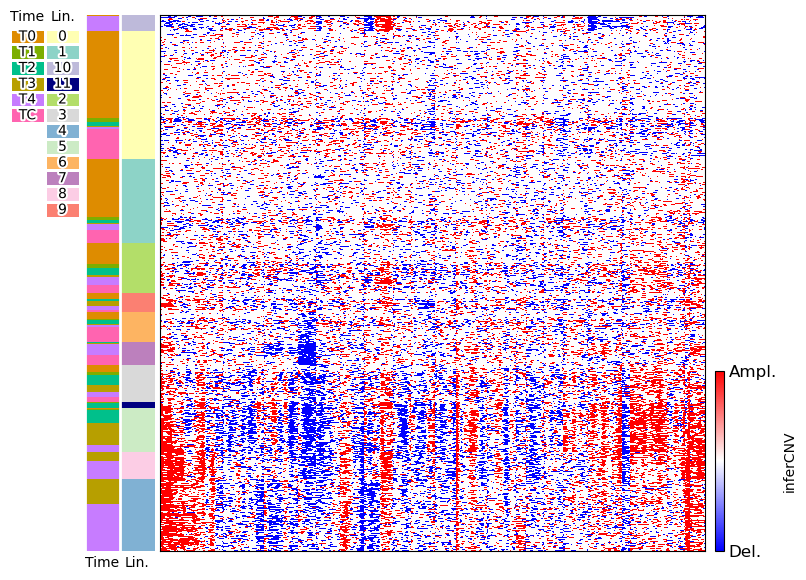

In [15]:
order = [10, 0, 1, 2, 9, 6, 7, 3, 11, 5, 8, 4] # v1

cnv_palette = {str(i): cm.Set3(c-1) for i, c in enumerate(order)}
cnv_palette.update({'T0': '#DE8C00', 'T1': '#7CAE00', 'T2': '#00C08B', 'T3': '#B79F00', 'T4': '#C77CFF', 'TC': '#FF64B0', '-1': 'white', 'TE': 'purple'})
cnv_palette.update({str(i): c for i, c in enumerate(['#FFFFB3','#8DD3C7','#B3DE69','#D9D9D9','#80B1D3', '#CCEBC5', '#FDB462', '#BC80BD', '#FCCDE5', '#FB8072', '#BEBADA', '#000080'])})

df_meta_temp = df_infercnv_meta.astype(str)[['time', 'lin.']].sort_values(by=['time'], ascending=False)
df_meta_temp = df_meta_temp.loc[~df_meta_temp['time'].isin(['TE'])]
df_meta_temp = df_meta_temp.iloc[np.hstack([np.argwhere(df_meta_temp['lin.'].values==str(c)).T[0] for c in reversed(order)])]

resInferCNV = cplot(df_infercnv_cnv[df_meta_temp.index], df_meta_temp, sampleMED=10, seed=0, figsize=(10,9),
            palette=cnv_palette, clusterVar=False, clusterObs=False, addLinesOnHeatmap=False, addLinesOnGroups=False, useMEDforObsGroups=True,
            colorbarLabel='inferCNV',
            saveFig=True, figureName='CNV_WM4237', dpi=500,
            colorbarLabels=['Ampl.', 'Del.'])

### Tree

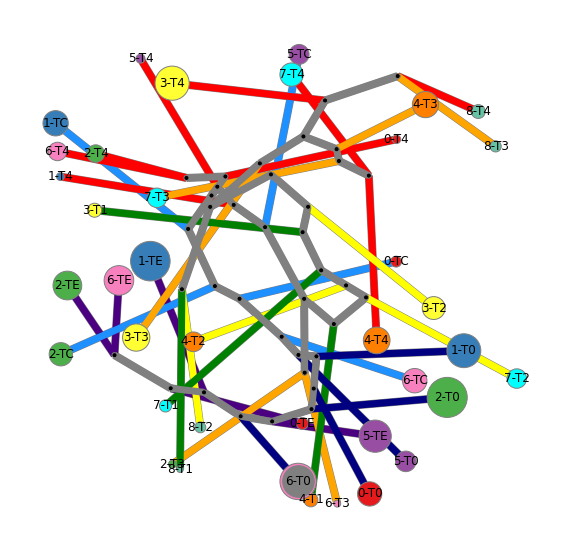

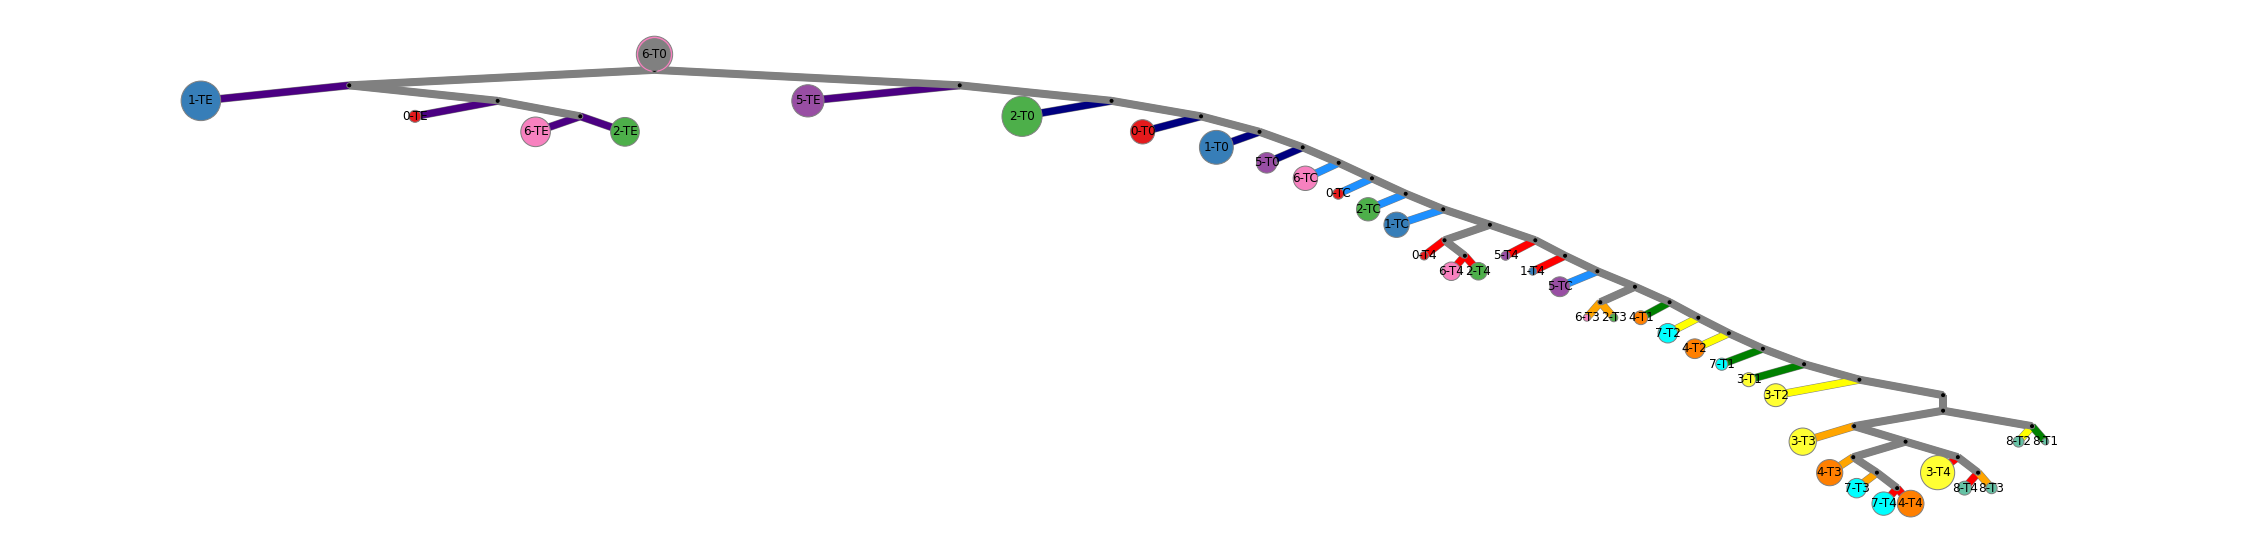

In [135]:
plotTree(*resInferCNV, seed=0, useSpringLayout=True, figsize=(10,10))
plotTree(*resInferCNV, seed=0, useSpringLayout=False)

# Correlation of CNVs across clusters

In [7]:
def viz(df, untreated_clusters=None, treated_clusters=None, figsize=(30,5), groups=None):
    
    def lU(df, i, time, shift=0.15, defsh=1):
        ax.axhline(defsh-i*shift, color='k', linewidth=0.5)
        dfsub = df[df.columns.intersection([(time, cluster) for cluster in untreated_clusters])]
        se = (dfsub-i*shift).mean(axis=1)
        se.plot(alpha=0.8, ax=ax)
        return dfsub.mean(axis=1)

    def lT(df, i, time, shift=0.15, defsh=1):
        ax.axhline(defsh-i*shift, color='k', linewidth=0.5)
        dfsub = df[df.columns.intersection([(time, cluster) for cluster in treated_clusters])]
        se = (dfsub-i*shift).mean(axis=1)
        se.plot(alpha=0.8, ax=ax)
        return dfsub.mean(axis=1)
    
    
    fig, ax = plt.subplots(figsize=figsize)
    for i, (a, b) in enumerate([['T0', 'TC'], ['T0', 'TE'], ['TC', 'TE']]):
        print(a, b, np.corrcoef(lU(df, i, a), lU(df, i, b))[0, 1])
    plt.show()
    
    fig, ax = plt.subplots(figsize=figsize)
    for i, (a, b) in enumerate([['T1', 'T2'], ['T2', 'T3'], ['T3', 'T4'], ['T1', 'T3'], ['T1', 'T4']]):
        print(a, b, np.corrcoef(lT(df, i, a), lT(df, i, b))[0, 1])
    plt.show()

    fig, ax = plt.subplots(figsize=figsize)
    print(a:='T1', b:='T4', np.corrcoef(lT(df, 0, a), lU(df, 0, b))[0, 1])
    print(a:='T0', b:='T4', np.corrcoef(lU(df, 1, a), lU(df, 1, b))[0, 1])
    plt.show()
    
    return

T0 TC 0.7076714730750236
T0 TE 0.6492448151557578
TC TE 0.5677350961483008


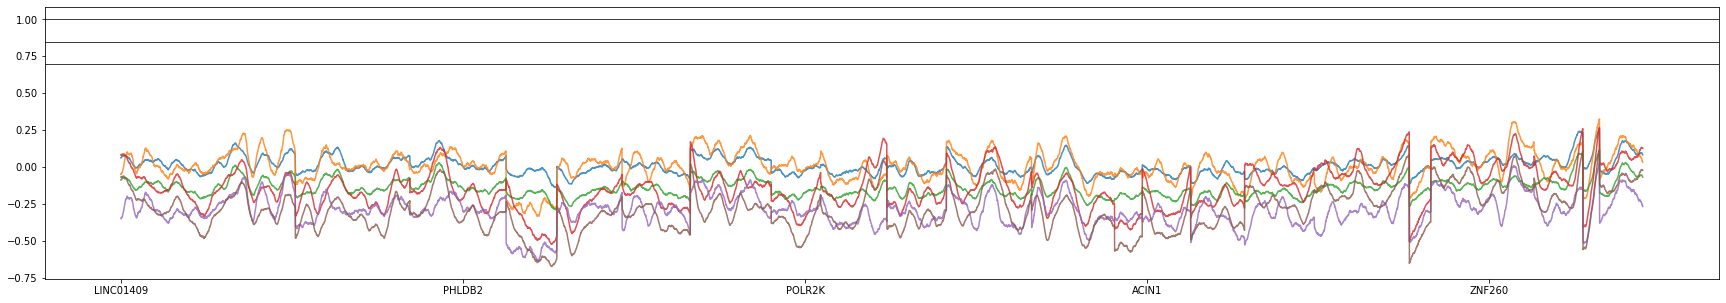

T1 T2 0.9029888846223593
T2 T3 0.8427085373388098
T3 T4 0.9297807564503745
T1 T3 0.7304068663751567
T1 T4 0.6106790857637179


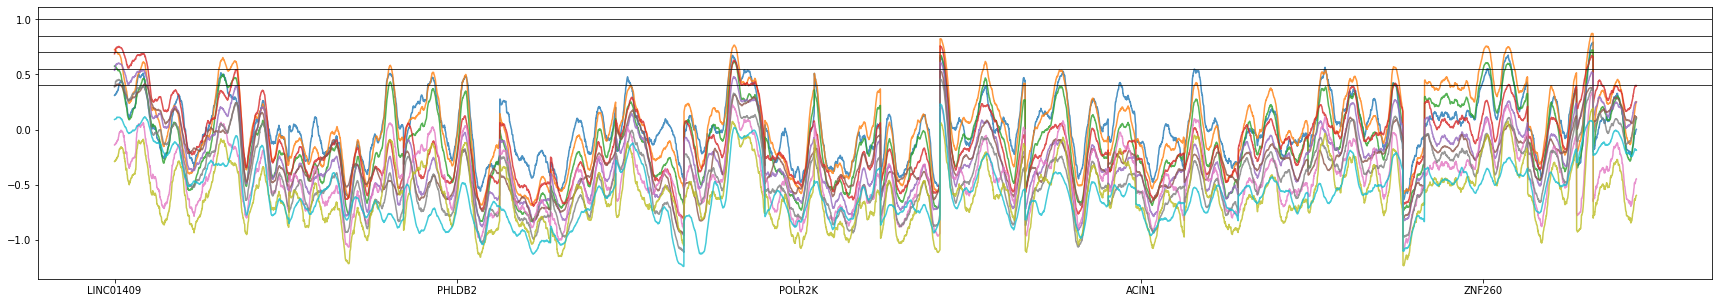

T1 T4 0.36453639661145365
T0 T4 0.28356757460419807


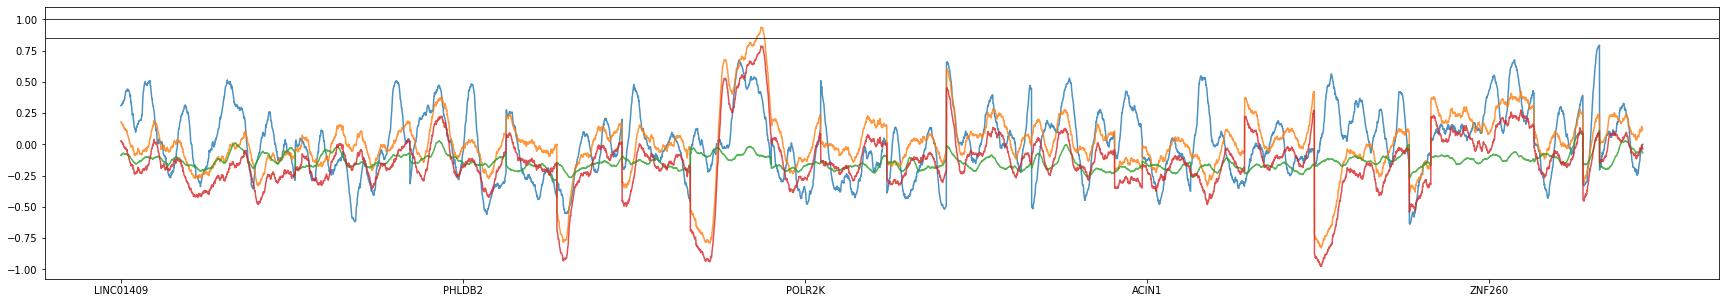

In [8]:
df = df_infercnv_cnv.copy()
df.columns = pd.MultiIndex.from_frame(df_infercnv_meta.loc[df_infercnv_cnv.columns].reset_index().rename({'index': 'spot'}, axis=1))
df = df.groupby(level=['time', 'cluster'], axis=1).mean()
df_g_infercnv_cnv = df.copy()
df_g_infercnv_cnv.shape

viz(df_g_infercnv_cnv, untreated_clusters=['0', '1', '5', '6'], treated_clusters=['2', '3', '4', '7', '8'])

# Correlation analysis
np.corrcoef is the same as "df.corr(method='pearson')" if there are no NaNs but much faster

Before filtering: (5000, 5000)
After filtering: (5000, 4836)


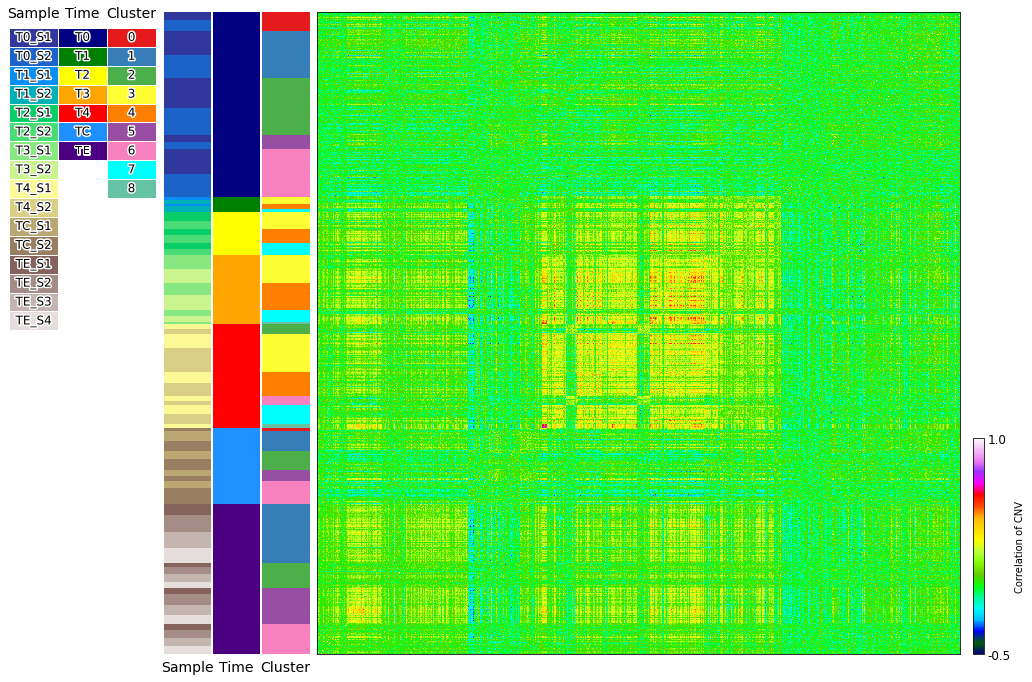

In [12]:
sel_cols = df_infercnv_cnv.sample(5000, axis=1).columns
df_corr_infercnv = pd.DataFrame(data=np.corrcoef(df_infercnv_cnv[sel_cols].T), index=sel_cols, columns=sel_cols)

df_temp, df_meta_temp = df_corr_infercnv, df_infercnv_meta.loc[sel_cols].astype(str)[['sample', 'time', 'cluster']].sort_values(by=['time', 'cluster', 'sample'], ascending=False)
res = cplot(df_temp.loc[df_meta_temp.index, df_meta_temp.index], df_meta_temp, palette=palette1, clusterVar=False, clusterObs=False, linkageMetric='correlation', linkageMethod='average', 
            addLinesOnHeatmap=False, addLinesOnGroups=False, reference=None, colorbarLabel='Correlation of CNV', colorbarLabels=None, keepOriginalOrderObs=False,
            colormap=plt.cm.gist_ncar, figsize=(19,15))